# Problem Statement

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

we have database for India.We need to predict:-
1.primary_fuel,which is categorical column,So It is a classification Problem.
2.capacity_mw ,which gas continuous data,so it is a Regression problem.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df =pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")


In [3]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(908, 25)

There are 908 rows and 25 columns.

In [5]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [6]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

## Categorical column:-
country,country_long,name,gppd_idnr,primary_fuel,other_fuel1,other_fuel2,owner,source,url,geolocation_source,generation_data_source
## numerical column:
capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh

# Count of unique value in each column

In [7]:
df.nunique()

country                       1
country_long                  1
name                        908
gppd_idnr                   908
capacity_mw                 365
latitude                    837
longitude                   828
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013         364
generation_gwh_2014         374
generation_gwh_2015         398
generation_gwh_2016         405
generation_gwh_2017         410
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

So we can see other_fuel2,other_fuel3,wepp_id,estimated_generation_gwh have not any data or only 1 data.So will drop these columns

In [3]:
df.drop(columns=['other_fuel2','other_fuel3','wepp_id','estimated_generation_gwh'],axis=1,inplace =True)

In [11]:
df.shape

(908, 21)

Now we have 21 columns

In [12]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,908.000000,862.000000,862.000000,528.000000,520.0,384.000000,401.000000,425.000000,437.000000,443.000000
mean,321.046378,21.196189,77.447848,1996.876894,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
std,580.221767,6.248627,4.907260,17.047817,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364
min,0.000000,8.168900,68.644700,1927.000000,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.837500,16.771575,74.258975,1988.000000,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170
50%,60.000000,21.778300,76.719250,2000.000000,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700
75%,388.125000,25.516375,79.441475,2011.250000,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000
max,4760.000000,34.649000,95.408000,2018.000000,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000


# Visualization

array([[<AxesSubplot:title={'center':'capacity_mw'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>],
       [<AxesSubplot:title={'center':'commissioning_year'}>,
        <AxesSubplot:title={'center':'year_of_capacity_data'}>,
        <AxesSubplot:title={'center':'generation_gwh_2013'}>],
       [<AxesSubplot:title={'center':'generation_gwh_2014'}>,
        <AxesSubplot:title={'center':'generation_gwh_2015'}>,
        <AxesSubplot:title={'center':'generation_gwh_2016'}>],
       [<AxesSubplot:title={'center':'generation_gwh_2017'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

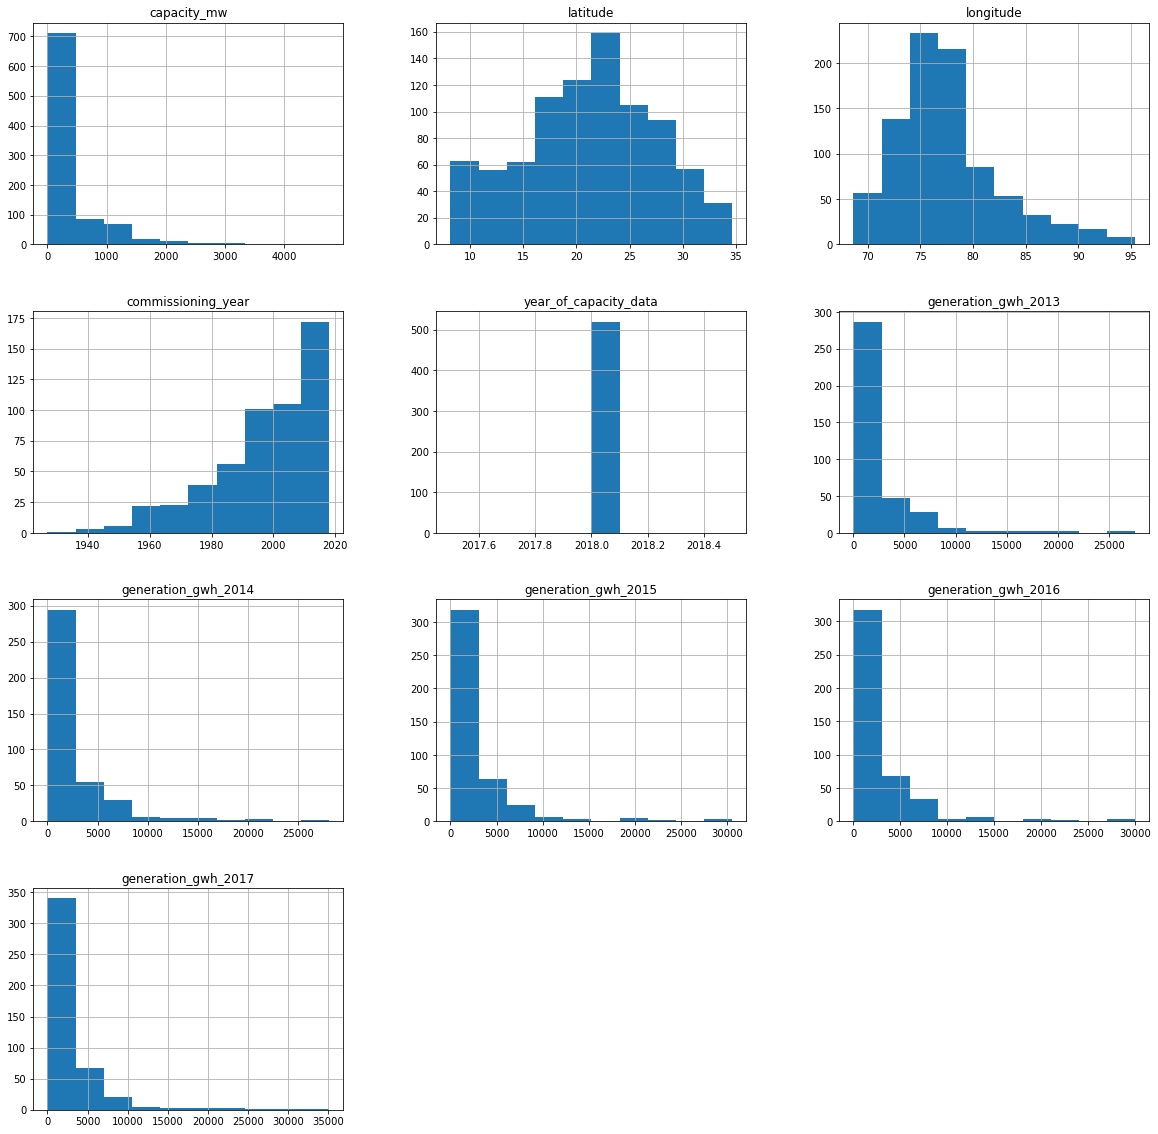

In [13]:
df.hist(figsize = (20,20))

In [15]:
column = ['country','country_long','name','gppd_idnr','primary_fuel','other_fuel1','owner','source','url','geolocation_source','generation_data_source']
for i in column:
    print(i," :")
    print(df[i].value_counts())
    print("\n")

country  :
IND    908
Name: country, dtype: int64


country_long  :
India    908
Name: country_long, dtype: int64


name  :
KUTTIADI                      1
ANUPUR TPP                    1
BINWA                         1
DANAPUR BMM                   1
Patodi Solar Power Plant      1
                             ..
DGEN MEGA CCCP                1
T.B. DAM                      1
Mithapur Solar Power Plant    1
IND BARATH TPP                1
BHADRAVATI MILL               1
Name: name, Length: 908, dtype: int64


gppd_idnr  :
WRI1019950    1
IND0000179    1
IND0000045    1
WRI1020017    1
WRI1026777    1
             ..
WRI1026065    1
IND0000506    1
IND0000365    1
WRI1026654    1
WRI1026211    1
Name: gppd_idnr, Length: 908, dtype: int64


primary_fuel  :
Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64


other_fuel1  :
Oil             196
Gas               2
Cogeneration      1
Name

# Univariate Analysis

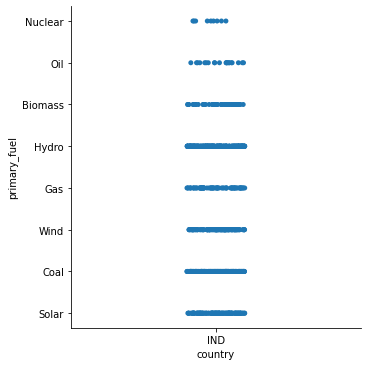

In [16]:
sns.catplot(x='country',y='primary_fuel',data=df)

Oil and Nuclear  less used as primary fuel.

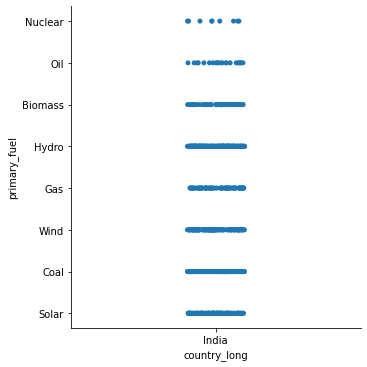

In [17]:
sns.catplot(x='country_long',y='primary_fuel',data=df)

<Figure size 1080x720 with 0 Axes>

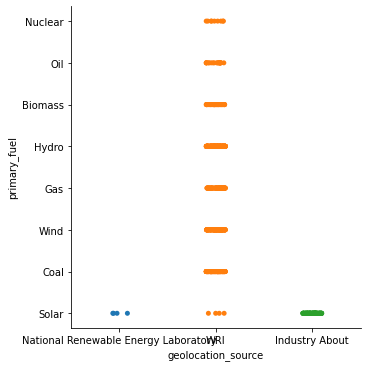

In [20]:
plt.figure(figsize=(15,10))
sns.catplot(x='geolocation_source',y='primary_fuel',data=df)
plt.show()

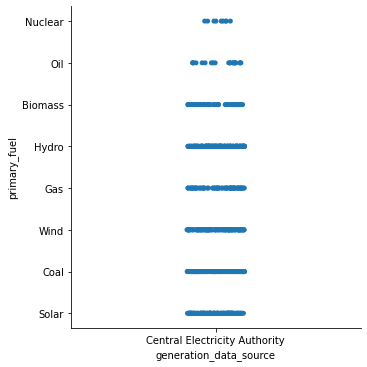

In [21]:
sns.catplot(x=df['generation_data_source'],y=df['primary_fuel'],data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

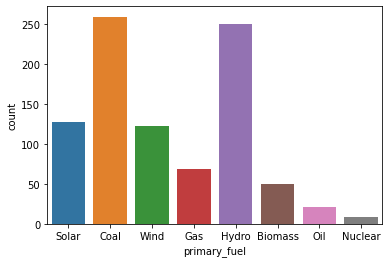

In [17]:
sns.countplot(df['primary_fuel'])

Coal count is more than other fuels in primary fuel column.

<AxesSubplot:xlabel='other_fuel1', ylabel='count'>

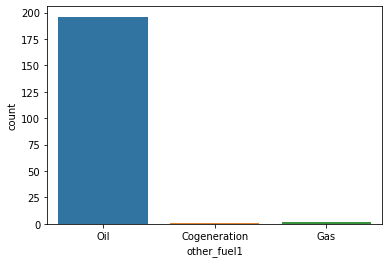

In [18]:
sns.countplot(df['other_fuel1'])

In Other fuel 1 Oil count is more than others.

<AxesSubplot:xlabel='geolocation_source', ylabel='count'>

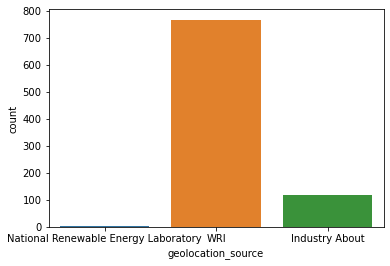

In [21]:
sns.countplot(df['geolocation_source'])

In [ ]:
In geolaocation_source column WRI has the highest count. 

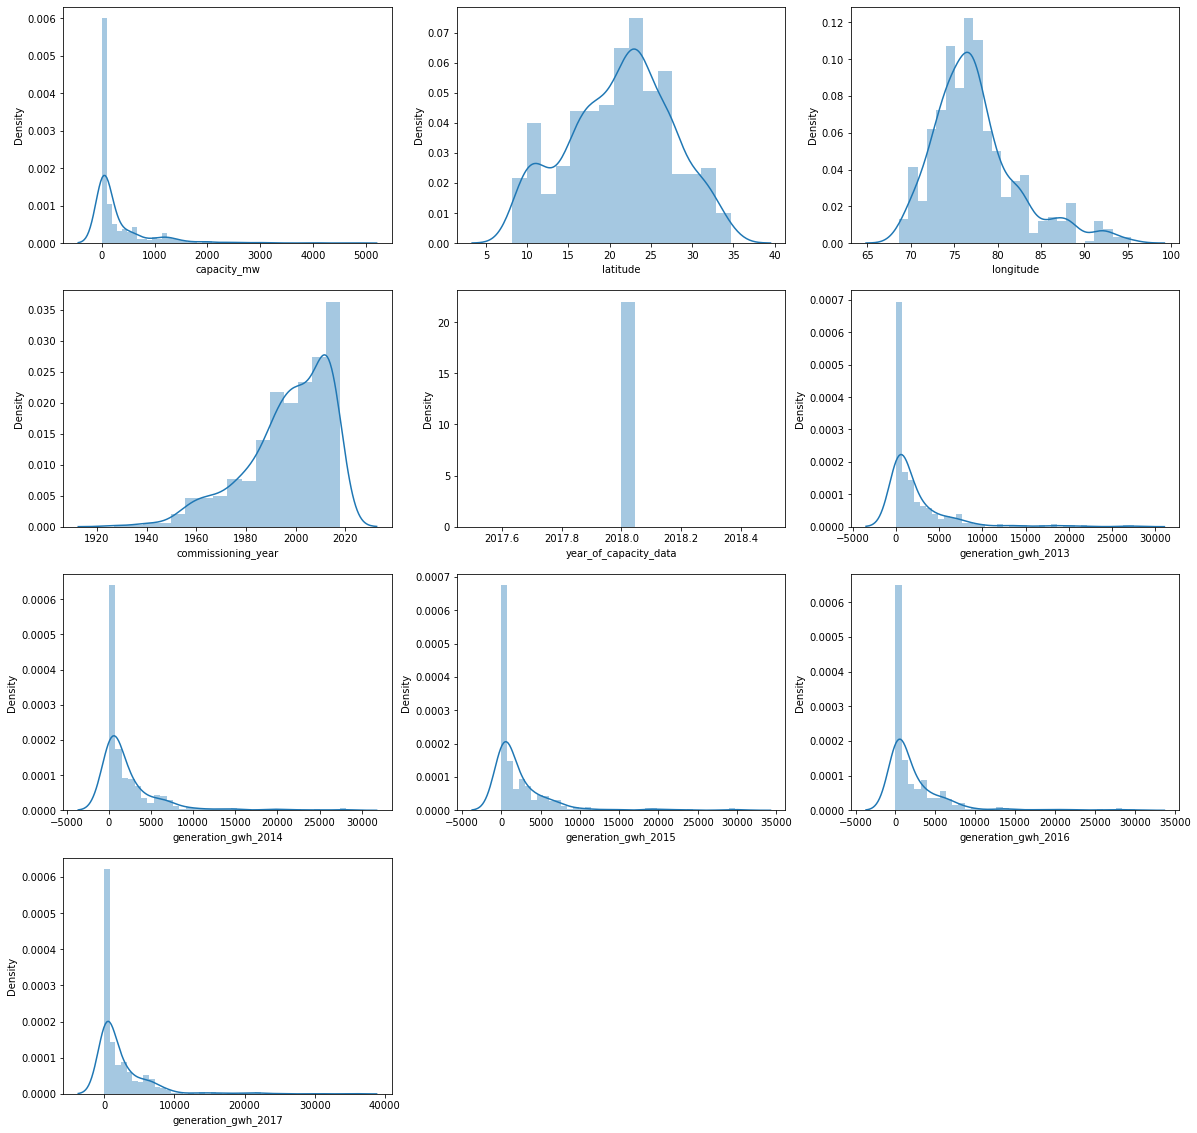

In [23]:
column=['capacity_mw','latitude','longitude','commissioning_year','year_of_capacity_data','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']
plt.figure(figsize=(20,20))
graph =1
for i in column:
    if graph <=10:
        ax=plt.subplot(4,3,graph)
        sns.distplot(df[i])
        plt.xlabel(i)
        graph +=1
        
plt.show()    

year_of_capacity_data has only one year value.
Data is not normally distributed in any numerical column except lattitude and logitude.
Data is showing skewness,means outliers are present in numeric columns.

# Bi-variate Analysis

<AxesSubplot:xlabel='latitude', ylabel='capacity_mw'>

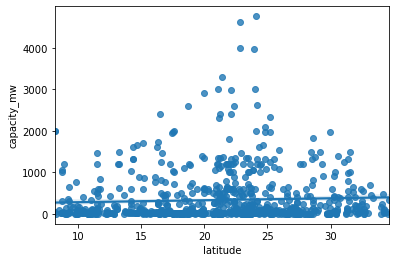

In [7]:
sns.regplot(df['latitude'],df['capacity_mw'])

Not any linear relationship between latitude and capacity_mw

<AxesSubplot:xlabel='longitude', ylabel='capacity_mw'>

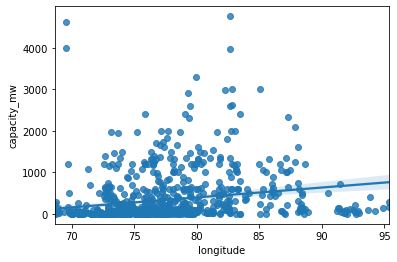

In [6]:
sns.regplot(df['longitude'],df["capacity_mw"])


Weak Linear relationship between longitude and capacity_mw.

<AxesSubplot:xlabel='generation_gwh_2013', ylabel='capacity_mw'>

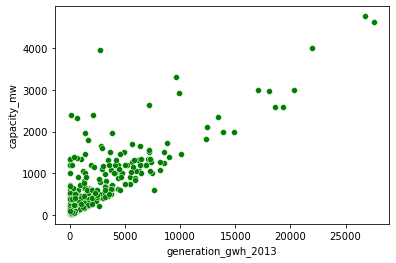

In [8]:
sns.scatterplot(x = "generation_gwh_2013", y = "capacity_mw", data = df,color="g")

Good Linear relationship between generation_gwh_2013 and capacity_mw.

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='capacity_mw'>

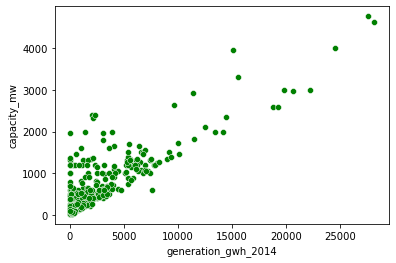

In [9]:
sns.scatterplot(x = "generation_gwh_2014", y = "capacity_mw", data = df,color="g")

Good Linear relationship between generation_gwh_2014 and capacity_mw.

<AxesSubplot:xlabel='generation_gwh_2015', ylabel='capacity_mw'>

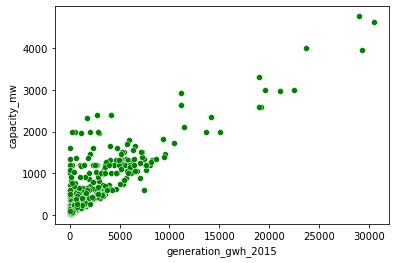

In [10]:
sns.scatterplot(x = "generation_gwh_2015", y = "capacity_mw", data = df,color="g")

In [ ]:
Good Linear relationship between generation_gwh_2015 and capacity_mw.

<AxesSubplot:xlabel='generation_gwh_2016', ylabel='capacity_mw'>

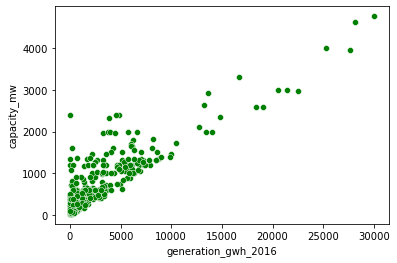

In [11]:
sns.scatterplot(x = "generation_gwh_2016", y = "capacity_mw", data = df,color="g")

In [ ]:
Good Linear relationship between generation_gwh_2016 and capacity_mw.

<AxesSubplot:xlabel='generation_gwh_2017', ylabel='capacity_mw'>

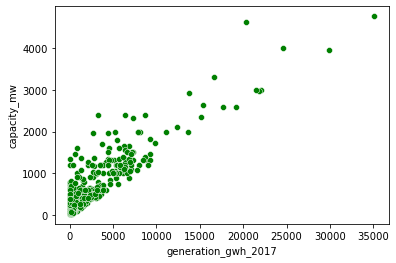

In [12]:
sns.scatterplot(x = "generation_gwh_2017", y = "capacity_mw", data = df,color="g")

In [ ]:
Good Linear relationship between generation_gwh_2017 and capacity_mw.

# Multivariate Analysis

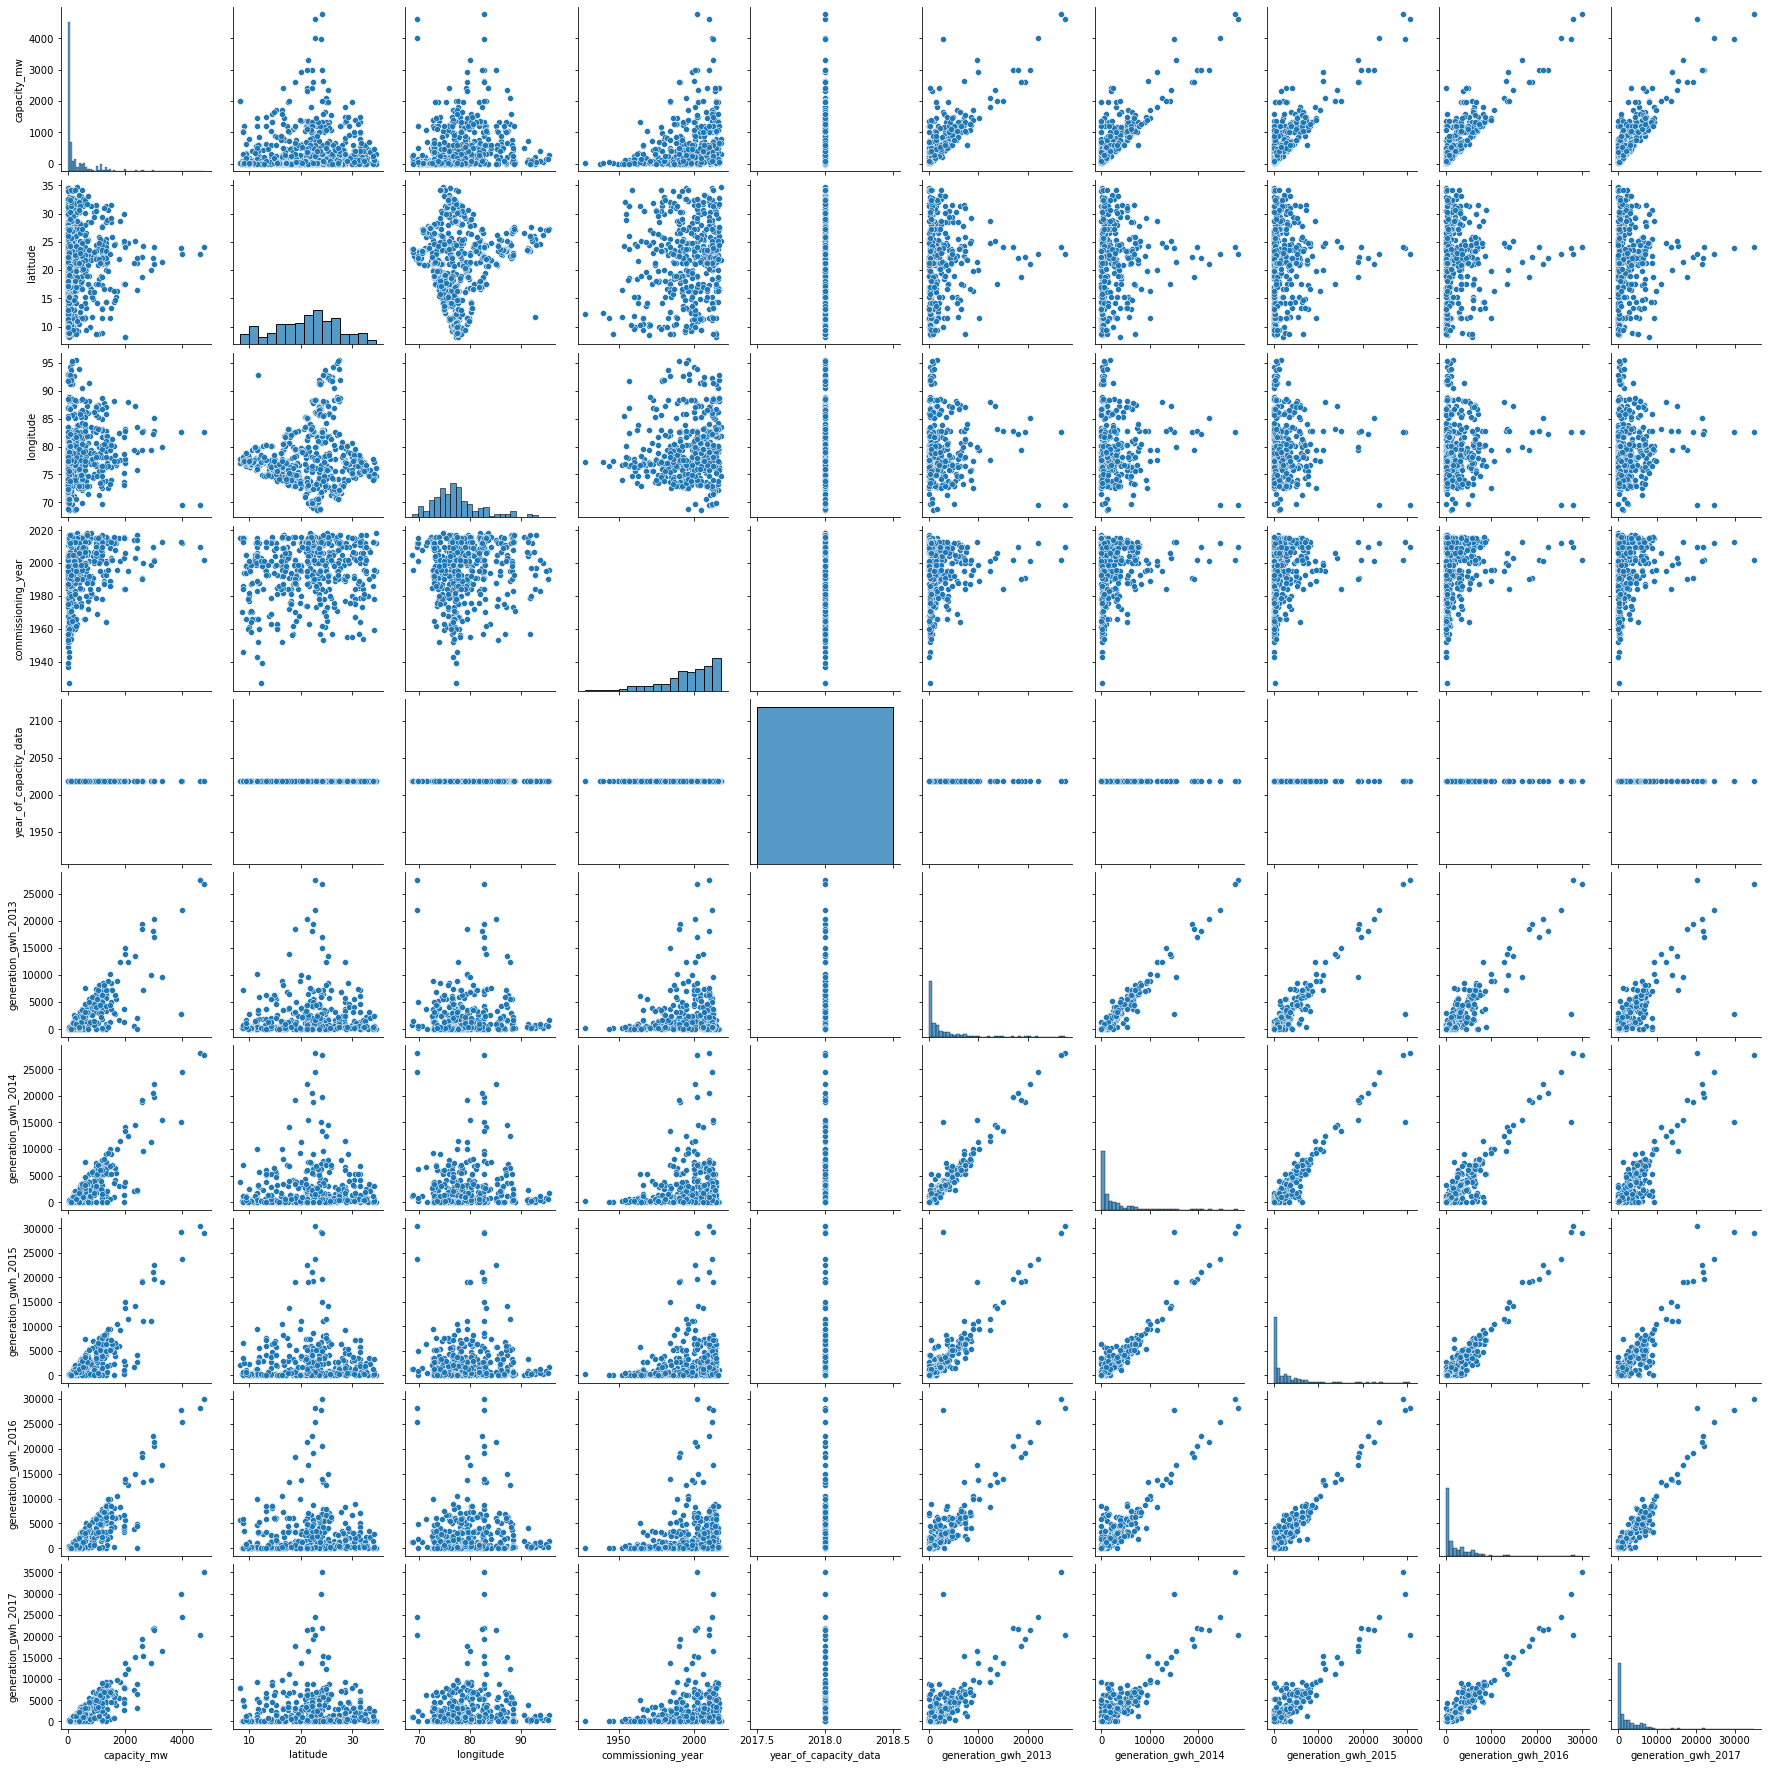

In [24]:
sns.pairplot(df)

# Data Preprocessing

In [25]:
df.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
other_fuel1               709
commissioning_year        380
owner                     566
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2013       524
generation_gwh_2014       507
generation_gwh_2015       483
generation_gwh_2016       471
generation_gwh_2017       465
generation_data_source    458
dtype: int64

Since numerical columns  lattitude and longitude are almost normally distributed,So will fill null values with mean.
all other numeric columns are showing outliers so will fill null values with median.
other_fuel1 have  very large number of missing values so will remove this column.

In [34]:
df.drop('other_fuel1',axis=1,inplace =True)

In [27]:
df.shape

(908, 20)

In [28]:
df.dtypes

country                    object
country_long               object
name                       object
gppd_idnr                  object
capacity_mw               float64
latitude                  float64
longitude                 float64
primary_fuel               object
commissioning_year        float64
owner                      object
source                     object
url                        object
geolocation_source         object
year_of_capacity_data     float64
generation_gwh_2013       float64
generation_gwh_2014       float64
generation_gwh_2015       float64
generation_gwh_2016       float64
generation_gwh_2017       float64
generation_data_source     object
dtype: object

In [35]:
df['latitude'] = df['latitude'].fillna(df['latitude'].mean())
df['longitude'] = df['longitude'].fillna(df['longitude'].mean())
df['commissioning_year']=df['commissioning_year'].fillna(df['commissioning_year'].median())
df['year_of_capacity_data']=df['year_of_capacity_data'].fillna(df['year_of_capacity_data'].median())
df['generation_gwh_2013']=df['generation_gwh_2013'].fillna(df['generation_gwh_2013'].median())
df['generation_gwh_2014']=df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].median())
df['generation_gwh_2015']=df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].median())
df['generation_gwh_2016']=df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].median())
df['generation_gwh_2017']=df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].median())



In [30]:
## Again checked null values:
df.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                    0
longitude                   0
primary_fuel                0
commissioning_year          0
owner                     566
source                      0
url                         0
geolocation_source         19
year_of_capacity_data       0
generation_gwh_2013         0
generation_gwh_2014         0
generation_gwh_2015         0
generation_gwh_2016         0
generation_gwh_2017         0
generation_data_source    458
dtype: int64

In [ ]:
So we have filled null values for numerical column.

In [36]:
## Filling null values in categorical column:
df['owner'] = df['owner'].fillna(df['owner'].mode()[0])
df['geolocation_source'] = df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])
df['owner'] = df['owner'].fillna(df['owner'].mode()[0])


In [33]:
df.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                    0
longitude                   0
primary_fuel                0
commissioning_year          0
owner                       0
source                      0
url                         0
geolocation_source          0
year_of_capacity_data       0
generation_gwh_2013         0
generation_gwh_2014         0
generation_gwh_2015         0
generation_gwh_2016         0
generation_gwh_2017         0
generation_data_source    458
dtype: int64

In [37]:
df['generation_data_source'] =df['generation_data_source'].fillna(df['generation_data_source'].mode()[0])

In [36]:
df.isnull().sum()

country                   0
country_long              0
name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
commissioning_year        0
owner                     0
source                    0
url                       0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2013       0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_data_source    0
dtype: int64

Now there is not any missing value.

# Correlation

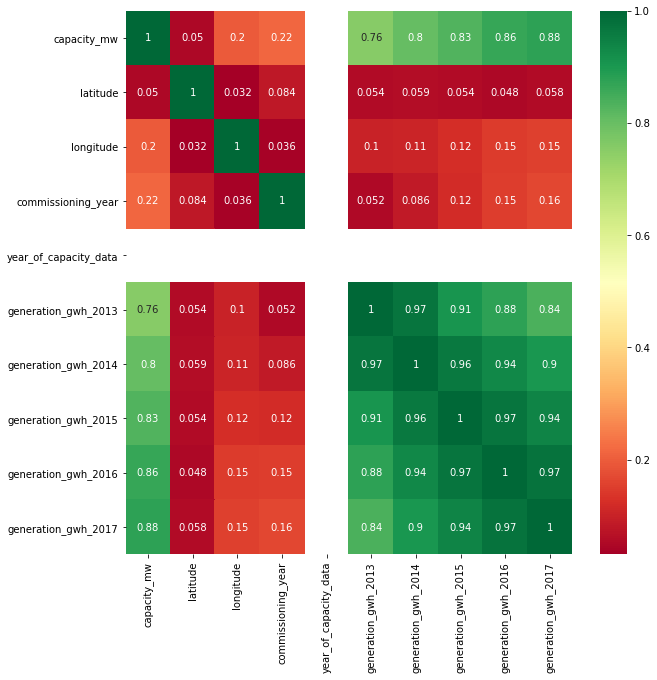

In [42]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot =True,cmap='RdYlGn')
plt.show()

In [ ]:
So we can see year_of_capacity_data has only one type of value,so it is showing not any value.
All the generation_gwh_2013 to generation_gwh_2017 columns are strongly  positive correlated to target value capacity_mw.
generation_gwh_2013 to generation_gwh_2017 columns are strongly positive correlated with each other more than 75%.
lattitude and longitude have very weak correlation with target column.

generation_data_source column has only one type of value,so it will not help model in any type of prediction,so will drop
these column.

In [38]:
## Dropping column year_of_capacity_data from dataset
df.drop(columns=['year_of_capacity_data','generation_data_source'],axis=1,inplace=True)

In [39]:
df.shape

(908, 18)

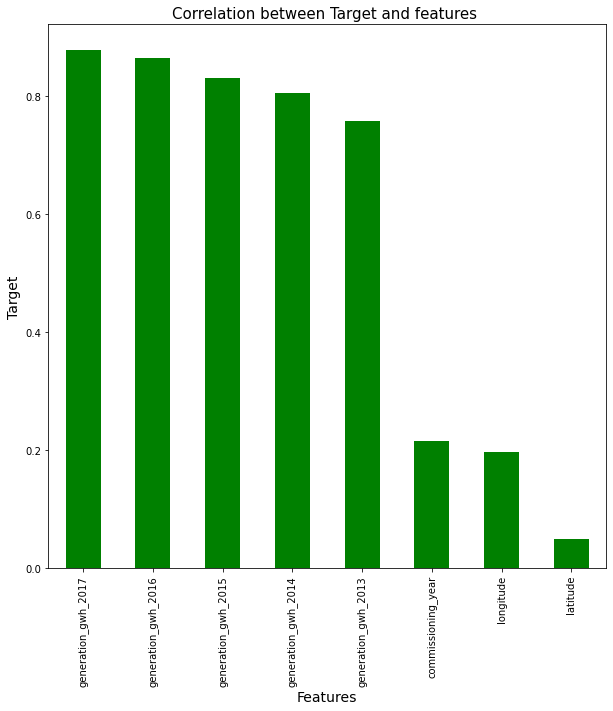

In [48]:
plt.figure(figsize=(10,10))
df.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='g')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.xticks(rotation=90)
plt.title('Correlation between Target and features ',fontsize=15)
plt.show()


# Outliers

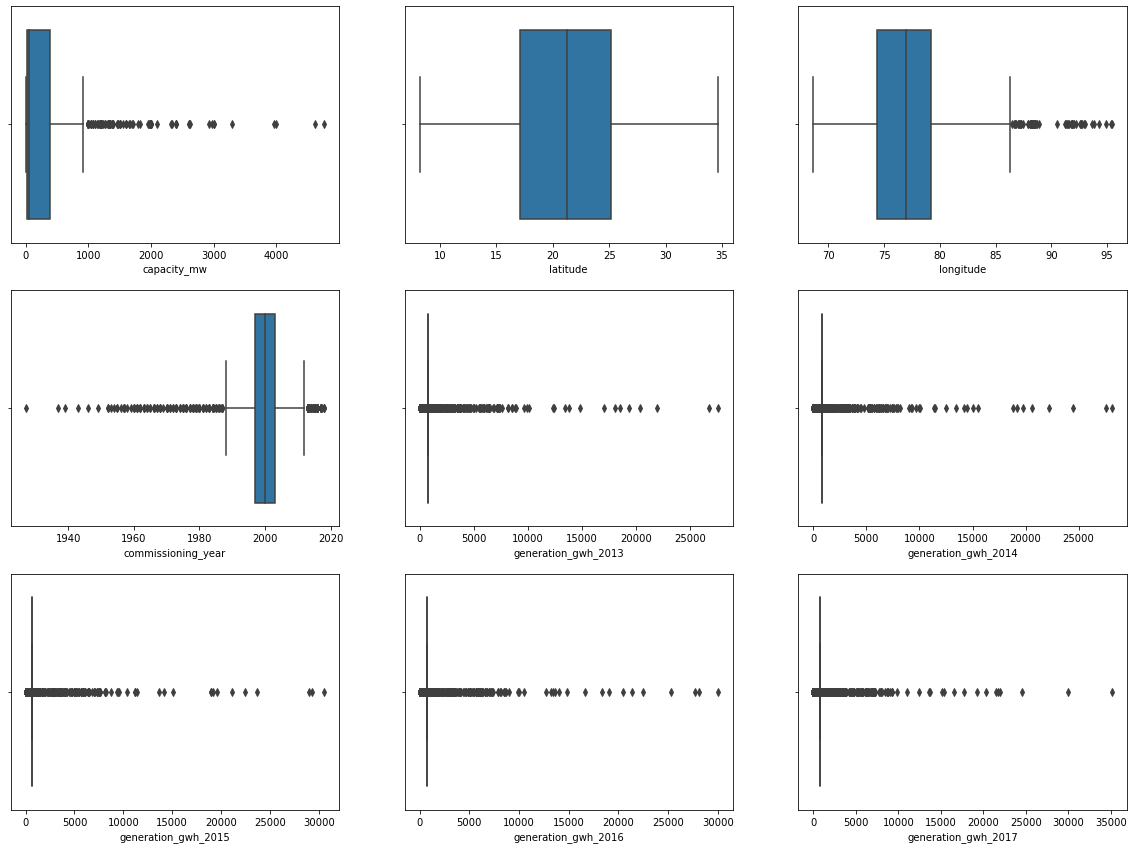

In [46]:
column=['capacity_mw','latitude','longitude','commissioning_year','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']
plt.figure(figsize=(20,20))
graph =1
for i in column:
    if graph <=10:
        ax=plt.subplot(4,3,graph)
        sns.boxplot(df[i])
        plt.xlabel(i)
        graph +=1
        
plt.show()    

# zscore

In [40]:
from scipy.stats import zscore
columns=df[['longitude','commissioning_year','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']]
z=np.abs(zscore(columns))

new_df = df[(z<3).all(axis=1)]
new_df.head()


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,797.063475,805.760000,701.02725,716.728350,807.601700
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,2000.0,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,797.063475,805.760000,701.02725,716.728350,807.601700
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,2000.0,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,797.063475,805.760000,701.02725,716.728350,807.601700
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,631.777928,617.789264,843.74700,886.004428,663.774500
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,1668.290000,3035.550000,5916.37000,6243.000000,5385.579736


In [41]:
print(df.shape)
print(new_df.shape)

(908, 18)
(852, 18)


In [53]:
data_loss =((908-852)/908)*100
           

In [54]:
data_loss

6.167400881057269

zscore has removed 56 rows,which contains outliers.

# Skewness

In [42]:
new_df.skew()

capacity_mw            2.134177
latitude              -0.108867
longitude              0.861390
commissioning_year    -1.209638
generation_gwh_2013    3.096648
generation_gwh_2014    2.940976
generation_gwh_2015    2.714988
generation_gwh_2016    2.635667
generation_gwh_2017    2.532066
dtype: float64

Except latitude,all columns are showing skewness.

In [43]:
from sklearn.preprocessing import PowerTransformer
skewed_features = ["longitude","commissioning_year","generation_gwh_2013","generation_gwh_2014","generation_gwh_2015","generation_gwh_2016","generation_gwh_2017","capacity_mw"]
scaler = PowerTransformer(method='yeo-johnson')


In [44]:
new_df[skewed_features] = scaler.fit_transform(new_df[skewed_features].values)
new_df[skewed_features].head()


,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,capacity_mw
0,-0.932007,1.197809,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,-1.675434
1,-0.512059,-0.053284,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.214717
2,-2.360637,-0.053284,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,-0.280583
3,2.506368,0.365655,-0.259129,-0.276296,0.101229,0.118902,-0.192428,0.386767
4,1.276071,1.736600,0.743909,1.423753,2.285309,2.271019,1.972415,1.740344


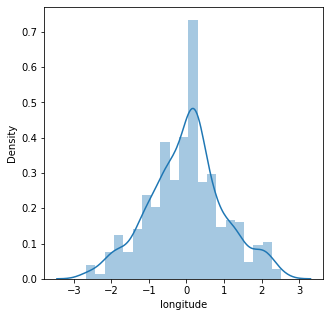

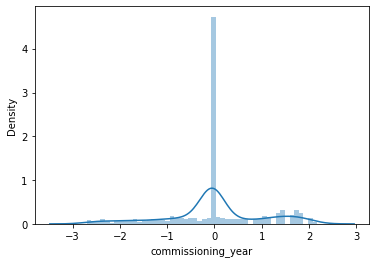

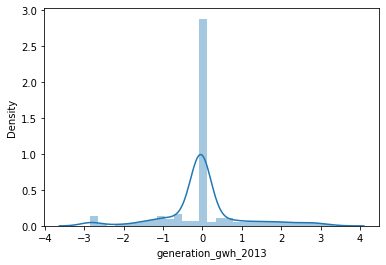

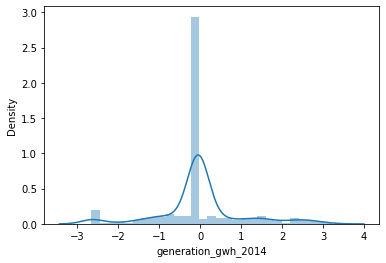

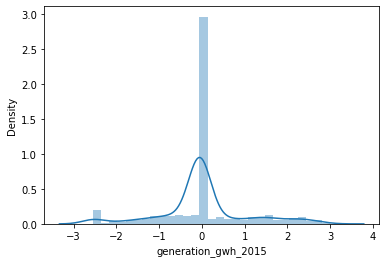

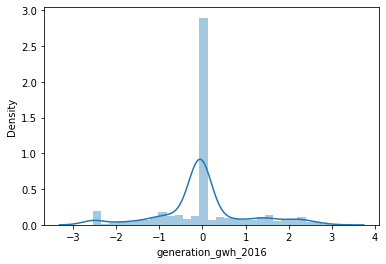

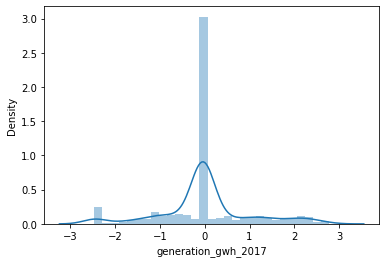

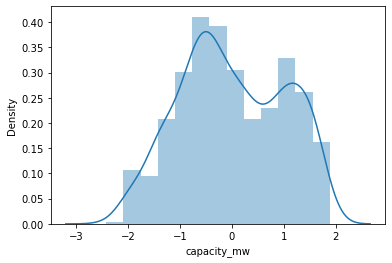

In [13]:
## Visualizing distribution of data again after removing skewness:-
columns = new_df[['longitude','commissioning_year','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','capacity_mw']]
plt.figure(figsize=(5,5))

for i in columns:
    sns.distplot(new_df[i])
    plt.show()    

Now data is almost normally distributed in each numeric column.

In [45]:
new_df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,IND,India,ACME Solar Tower,WRI1020239,-1.675434,28.1839,-0.932007,Solar,1.197809,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,0.214717,24.7663,-0.512059,Coal,-0.053284,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236
2,IND,India,AES Saurashtra Windfarms,WRI1026669,-0.280583,21.9038,-2.360637,Wind,-0.053284,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236
3,IND,India,AGARTALA GT,IND0000001,0.386767,23.8712,2.506368,Gas,0.365655,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,-0.259129,-0.276296,0.101229,0.118902,-0.192428
4,IND,India,AKALTARA TPP,IND0000002,1.740344,21.9603,1.276071,Coal,1.736600,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,0.743909,1.423753,2.285309,2.271019,1.972415


In [ ]:
Oil and Nuclear less used in India as primary fuel.

In [22]:
df['country'].nunique()

1

In [23]:
df['country_long'].nunique()

1

Since country and country_long has only one type of value.So it does not help model in any type of prediction,so will drop these columns.

In [46]:
new_df.drop(columns=['country','country_long'],axis=1,inplace=True)

In [47]:
new_df.shape

(852, 16)

In [48]:
new_df.head()

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,ACME Solar Tower,WRI1020239,-1.675434,28.1839,-0.932007,Solar,1.197809,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236
1,ADITYA CEMENT WORKS,WRI1019881,0.214717,24.7663,-0.512059,Coal,-0.053284,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236
2,AES Saurashtra Windfarms,WRI1026669,-0.280583,21.9038,-2.360637,Wind,-0.053284,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236
3,AGARTALA GT,IND0000001,0.386767,23.8712,2.506368,Gas,0.365655,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,-0.259129,-0.276296,0.101229,0.118902,-0.192428
4,AKALTARA TPP,IND0000002,1.740344,21.9603,1.276071,Coal,1.736600,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,0.743909,1.423753,2.285309,2.271019,1.972415


# Label Encoder

In [49]:
columns =['name','gppd_idnr','primary_fuel','owner','source','url','geolocation_source']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
new_df[columns]= new_df[columns].apply(le.fit_transform)


In [50]:
new_df.head(10)

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,0,603,-1.675434,28.1839,-0.932007,6,1.197809,228,109,128,1,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236
1,1,465,0.214717,24.7663,-0.512059,1,-0.053284,257,174,173,2,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236
2,2,798,-0.280583,21.9038,-2.360637,7,-0.053284,2,21,205,2,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236
3,3,0,0.386767,23.8712,2.506368,2,0.365655,5,22,58,2,-0.259129,-0.276296,0.101229,0.118902,-0.192428
4,4,1,1.740344,21.9603,1.276071,1,1.736600,5,22,58,2,0.743909,1.423753,2.285309,2.271019,1.972415
5,5,2,0.715230,23.7689,-2.676966,1,0.476531,5,22,58,2,-0.015008,0.295749,0.423205,0.366198,0.257477
6,6,3,-0.050119,10.4547,0.136861,3,-2.218450,5,22,58,2,-1.315959,-1.209349,-1.067455,-1.487806,-1.354258
7,7,4,0.574960,32.2258,0.186254,3,1.070623,5,22,58,2,-0.170457,-0.202300,-0.029644,-0.101112,-0.174473
8,8,5,0.793791,16.3300,-0.153648,3,0.365655,5,22,58,2,-0.453038,-0.477786,-1.095297,-0.480977,-0.488380
9,9,6,0.622656,23.1642,1.136023,1,0.824805,5,22,58,2,1.327998,0.829281,0.723803,0.485556,0.543490


# Separating features and Target for classification problem

In [51]:
x = new_df.drop('primary_fuel',axis=1)
y= new_df['primary_fuel']

In [52]:
x.shape,y.shape

((852, 15), (852,))

# Standardization

In [54]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)


# Checking for Multicollinearity Problem using VIF:- 


In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif


,VIF values,Features
0,1.402425,name
1,4.366263,gppd_idnr
2,2.525606,capacity_mw
3,1.148491,latitude
4,1.345718,longitude
5,1.274429,commissioning_year
6,3.796814,owner
7,3.080228,source
8,2.116240,url
9,2.180436,geolocation_source


all values are less than 10.So  good to go for next step.

# Finding Best Random State:-

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    rf = RandomForestClassifier()
    rf.fit(x_train, y_train)
    pred = rf.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)


Best accuracy is  0.890625  on Random_state  135


In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [58]:
x_train.shape,y_train.shape

((596, 15), (596,))

In [59]:
x_test.shape,y_test.shape

((256, 15), (256,))

# Model Building

In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_roc_curve


# KNeighborsClassifier

In [61]:
knc = KNeighborsClassifier()
knc.fit(x_train,y_train)
predknc = knc.predict(x_test)

print(accuracy_score(y_test, predknc))
print(confusion_matrix(y_test, predknc))
print(classification_report(y_test,predknc))


0.796875
[[10  9  0  0  0  0  0  0]
 [ 2 61  4  3  0  0  0  1]
 [ 1  5  4  7  0  0  0  0]
 [ 0  9  0 50  0  0  0  0]
 [ 0  1  0  1  0  0  0  1]
 [ 0  4  2  0  0  0  0  0]
 [ 0  2  0  0  0  0 40  0]
 [ 0  0  0  0  0  0  0 39]]
              precision    recall  f1-score   support

           0       0.77      0.53      0.62        19
           1       0.67      0.86      0.75        71
           2       0.40      0.24      0.30        17
           3       0.82      0.85      0.83        59
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         6
           6       1.00      0.95      0.98        42
           7       0.95      1.00      0.97        39

    accuracy                           0.80       256
   macro avg       0.58      0.55      0.56       256
weighted avg       0.77      0.80      0.78       256



Biomass-0
Coal-1
Gas-2
Hydro-3
Nuclear-4
Oil-5
Solar-6
Wind-7
We can check for every class precision,recall,F-1 Score and Accuracy.

# Support Vector Machine Classifier

In [63]:
svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)

print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test,predsvc))


0.8203125
[[ 8  9  0  0  0  0  0  2]
 [ 1 68  0  1  0  0  0  1]
 [ 1  4  2 10  0  0  0  0]
 [ 0  6  0 53  0  0  0  0]
 [ 0  1  0  1  0  0  0  1]
 [ 0  4  0  2  0  0  0  0]
 [ 0  2  0  0  0  0 40  0]
 [ 0  0  0  0  0  0  0 39]]
              precision    recall  f1-score   support

           0       0.80      0.42      0.55        19
           1       0.72      0.96      0.82        71
           2       1.00      0.12      0.21        17
           3       0.79      0.90      0.84        59
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         6
           6       1.00      0.95      0.98        42
           7       0.91      1.00      0.95        39

    accuracy                           0.82       256
   macro avg       0.65      0.54      0.54       256
weighted avg       0.81      0.82      0.78       256



Biomass-0
Coal-1
Gas-2
Hydro-3
Nuclear-4
Oil-5
Solar-6
Wind-7
We can check for every class precision,recall,F-1 Score and Accuracy.

# DecisionTreeClassifier

In [64]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc = dtc.predict(x_test)

print(accuracy_score(y_test, preddtc))
print(confusion_matrix(y_test, preddtc))
print(classification_report(y_test,preddtc))


0.82421875
[[15  4  0  0  0  0  0  0]
 [ 1 55  7  5  3  0  0  0]
 [ 0  4  9  4  0  0  0  0]
 [ 1  5  1 50  1  1  0  0]
 [ 0  1  1  0  0  0  0  1]
 [ 0  1  4  0  0  1  0  0]
 [ 0  0  0  0  0  0 42  0]
 [ 0  0  0  0  0  0  0 39]]
              precision    recall  f1-score   support

           0       0.88      0.79      0.83        19
           1       0.79      0.77      0.78        71
           2       0.41      0.53      0.46        17
           3       0.85      0.85      0.85        59
           4       0.00      0.00      0.00         3
           5       0.50      0.17      0.25         6
           6       1.00      1.00      1.00        42
           7       0.97      1.00      0.99        39

    accuracy                           0.82       256
   macro avg       0.67      0.64      0.64       256
weighted avg       0.83      0.82      0.82       256



Biomass-0
Coal-1
Gas-2
Hydro-3
Nuclear-4
Oil-5
Solar-6
Wind-7
We can check for every class precision,recall,F-1 Score and Accuracy.

# AdaBoostClassifier

In [65]:
adb = AdaBoostClassifier()
adb.fit(x_train,y_train)
predadb = adb.predict(x_test)

print(accuracy_score(y_test, predadb))
print(confusion_matrix(y_test, predadb))
print(classification_report(y_test,predadb))


0.484375
[[ 0  0  0 19  0  0  0  0]
 [ 0 28  0 43  0  0  0  0]
 [ 0  1  0 16  0  0  0  0]
 [ 0  5  0 54  0  0  0  0]
 [ 0  1  0  1  0  0  1  0]
 [ 0  0  0  6  0  0  0  0]
 [ 0  0  0  0  0  0 42  0]
 [ 0  0  0  0  0  0 39  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.80      0.39      0.53        71
           2       0.00      0.00      0.00        17
           3       0.39      0.92      0.55        59
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         6
           6       0.51      1.00      0.68        42
           7       0.00      0.00      0.00        39

    accuracy                           0.48       256
   macro avg       0.21      0.29      0.22       256
weighted avg       0.40      0.48      0.38       256



Biomass-0
Coal-1
Gas-2
Hydro-3
Nuclear-4
Oil-5
Solar-6
Wind-7
We can check for every class: precision,recall,F-1 Score and Accuracy.

# RandomForestClassifier

In [66]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc = rfc.predict(x_test)

print(accuracy_score(y_test, predrfc))
print(confusion_matrix(y_test, predrfc))
print(classification_report(y_test,predrfc))


0.8828125
[[15  4  0  0  0  0  0  0]
 [ 0 64  4  3  0  0  0  0]
 [ 0  3  9  4  0  1  0  0]
 [ 0  3  0 56  0  0  0  0]
 [ 0  2  0  0  0  0  0  1]
 [ 0  3  2  0  0  1  0  0]
 [ 0  0  0  0  0  0 42  0]
 [ 0  0  0  0  0  0  0 39]]
              precision    recall  f1-score   support

           0       1.00      0.79      0.88        19
           1       0.81      0.90      0.85        71
           2       0.60      0.53      0.56        17
           3       0.89      0.95      0.92        59
           4       0.00      0.00      0.00         3
           5       0.50      0.17      0.25         6
           6       1.00      1.00      1.00        42
           7       0.97      1.00      0.99        39

    accuracy                           0.88       256
   macro avg       0.72      0.67      0.68       256
weighted avg       0.87      0.88      0.87       256



Biomass-0
Coal-1
Gas-2
Hydro-3
Nuclear-4
Oil-5
Solar-6
Wind-7
We can check for every class: precision,recall,F-1 Score and Accuracy.

# LogisticRegression

In [68]:
lgr = LogisticRegression()
lgr.fit(x_train,y_train)
predlgr = lgr.predict(x_test)

print(accuracy_score(y_test, predlgr))
print(confusion_matrix(y_test, predlgr))
print(classification_report(y_test,predlgr))


0.80859375
[[11  7  0  0  0  0  0  1]
 [ 1 60  3  5  1  0  0  1]
 [ 0  5  4  8  0  0  0  0]
 [ 0  8  0 51  0  0  0  0]
 [ 0  0  0  2  0  0  0  1]
 [ 0  2  0  3  0  1  0  0]
 [ 0  1  0  0  0  0 41  0]
 [ 0  0  0  0  0  0  0 39]]
              precision    recall  f1-score   support

           0       0.92      0.58      0.71        19
           1       0.72      0.85      0.78        71
           2       0.57      0.24      0.33        17
           3       0.74      0.86      0.80        59
           4       0.00      0.00      0.00         3
           5       1.00      0.17      0.29         6
           6       1.00      0.98      0.99        42
           7       0.93      1.00      0.96        39

    accuracy                           0.81       256
   macro avg       0.73      0.58      0.61       256
weighted avg       0.81      0.81      0.79       256



Biomass-0
Coal-1
Gas-2
Hydro-3
Nuclear-4
Oil-5
Solar-6
Wind-7
We can check for every class: precision,recall,F-1 Score and Accuracy.

# Cross Validation

In [70]:
from sklearn.model_selection import ShuffleSplit
n_samples = x.shape[0]
cv = ShuffleSplit(n_splits=3, test_size=0.30, random_state=maxRS)
cvs = cross_val_score(lgr, x, y, cv=cv)
print("Cross Validation of LogisticRegression model ",cvs.mean())


Cross Validation of LogisticRegression model  0.7721354166666666


In [73]:
from sklearn.model_selection import ShuffleSplit
n_samples = x.shape[0]
cv = ShuffleSplit(n_splits=3, test_size=0.30, random_state=maxRS)
cvs = cross_val_score(knc, x, y, cv=cv)
print("Cross Validation of KNeighbors Classifier model ",cvs.mean())


Cross Validation of KNeighbors Classifier model  0.7786458333333334


In [74]:
from sklearn.model_selection import ShuffleSplit
n_samples = x.shape[0]
cv = ShuffleSplit(n_splits=3, test_size=0.30, random_state=maxRS)
cvs = cross_val_score(dtc, x, y, cv=cv)
print("Cross Validation of DecisionTree Classifier model ",cvs.mean())


Cross Validation of DecisionTree Classifier model  0.78125


In [75]:
from sklearn.model_selection import ShuffleSplit
n_samples = x.shape[0]
cv = ShuffleSplit(n_splits=3, test_size=0.30, random_state=maxRS)
cvs = cross_val_score(rfc, x, y, cv=cv)
print("Cross Validation of Random Forest Classifier model ",cvs.mean())


Cross Validation of Random Forest Classifier model  0.8268229166666666


In [76]:
from sklearn.model_selection import ShuffleSplit
n_samples = x.shape[0]
cv = ShuffleSplit(n_splits=3, test_size=0.30, random_state=maxRS)
cvs = cross_val_score(adb, x, y, cv=cv)
print("Cross Validation of Ada Boost Classifier model ",cvs.mean())


Cross Validation of Ada Boost Classifier model  0.5260416666666666


Cross validation of Random Forest Classifier model is highest,So will do Hyperparameter tuning for that only.

# HyperParameter Tuning

In [79]:
from sklearn.model_selection import GridSearchCV

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = maxRS,test_size = 0.30)
rf = RandomForestClassifier()
parameters={'n_estimators' : [100,200],
            'criterion':['gini','entropy'],
            'max_depth':range(2,10),
            'max_features':["auto","sqrt","log2"],
            }


    
gridsearch=GridSearchCV(rf,parameters)
gridsearch.fit(x_train,y_train)
gridsearch.best_params_


{'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'log2',
 'n_estimators': 200}

In [78]:
## Providing Best parameter to model:-
rf = RandomForestClassifier(criterion='entropy',n_estimators=200,max_features='sqrt',max_depth=9)
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
score = accuracy_score(y_test,predrfc)
print("Accuracy Score :",score*100)
print(confusion_matrix(y_test, predrf))
print(classification_report(y_test,predrf))


Accuracy Score : 86.71875
[[15  4  0  0  0  0  0  0]
 [ 0 66  2  3  0  0  0  0]
 [ 0  2  4 11  0  0  0  0]
 [ 0  4  0 55  0  0  0  0]
 [ 0  1  0  1  0  0  0  1]
 [ 0  1  3  1  0  1  0  0]
 [ 0  0  0  0  0  0 42  0]
 [ 0  0  0  0  0  0  0 39]]
              precision    recall  f1-score   support

           0       1.00      0.79      0.88        19
           1       0.85      0.93      0.89        71
           2       0.44      0.24      0.31        17
           3       0.77      0.93      0.85        59
           4       0.00      0.00      0.00         3
           5       1.00      0.17      0.29         6
           6       1.00      1.00      1.00        42
           7       0.97      1.00      0.99        39

    accuracy                           0.87       256
   macro avg       0.76      0.63      0.65       256
weighted avg       0.85      0.87      0.85       256



In [ ]:
Without hyperparameter tuning Random Forest has given better accuracy.So will save model using that only.

# Saving the Model:-

In [ ]:
import pickle
filename ='Primary_fuel_prediction.pickle'
pickle.dump(rfc,open(filename,'wb'))

# Conclusion

In [ ]:
a = np.array(y_test)
predicted = np.array(rfc.predict(x_test))
df_new = pd.DataFrame({"Original":a,"Predicted":predicted},index= range(len(a)))
df_new


# For Regression label

In [80]:
new_df.columns

Index(['name', 'gppd_idnr', 'capacity_mw', 'latitude', 'longitude',
       'primary_fuel', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'generation_gwh_2013', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017'],
      dtype='object')

In [81]:
#assign the value of x and y for training and testing phase
xr = new_df.drop('capacity_mw',axis=1)
yr = new_df["capacity_mw"]
print(xr.shape)
print(yr.shape)


(852, 15)
(852,)


In [82]:
#Standardize the value of xr so that mean will 0 and SD will become 1 , and make the data as normal distributed
sc = StandardScaler()
sc.fit_transform(xr)


array([[-1.73001908,  0.72168833,  1.15891133, ..., -0.05289577,
        -0.05461032, -0.03923642],
       [-1.72595323,  0.16060107,  0.5986922 , ..., -0.05289577,
        -0.05461032, -0.03923642],
       [-1.72188738,  1.51452904,  0.12946607, ..., -0.05289577,
        -0.05461032, -0.03923642],
       ...,
       [ 1.72188738,  1.66903133, -0.95700759, ..., -0.05289577,
        -0.05461032, -0.03923642],
       [ 1.72595323,  0.24191806,  0.53045156, ..., -0.05289577,
        -0.05461032, -0.03923642],
       [ 1.73001908,  1.60804358, -1.83257946, ..., -0.05289577,
        -0.05461032, -0.03923642]])

# Step 3.Choosing the Model:-

In [84]:
from sklearn.linear_model import Lasso,LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error


In [86]:
#Now by using multiple Algorithms we are calculating the best model which suit best for our data set:- 

model = [DecisionTreeRegressor(),KNeighborsRegressor(),AdaBoostRegressor(),LinearRegression(),GradientBoostingRegressor(),RandomForestRegressor()]
max_r2_score = 0
for r_state in range(40,200):
    xr_train,xr_test,yr_train,yr_test = train_test_split(xr,yr,random_state = r_state,test_size = 0.30)
    for i in model:
        i.fit(xr_train,yr_train)
        pred = i.predict(xr_test)
        score = r2_score(yr_test,pred)
        print("R2 score correspond to random state " ,r_state ,"is", score)
        if score> max_r2_score:
            max_r2_score=score
            final_state = r_state
            final_model = i
            
print("max R2 score correspond to random state " ,final_state , "is" , max_r2_score ,"and model is",final_model)


R2 score correspond to random state  40 is 0.6676758188706476
R2 score correspond to random state  40 is 0.38110704219066904
R2 score correspond to random state  40 is 0.7292055641894816
R2 score correspond to random state  40 is 0.5523494921171317
R2 score correspond to random state  40 is 0.7909067132392966
R2 score correspond to random state  40 is 0.7812017623625349
R2 score correspond to random state  41 is 0.6894647835138713
R2 score correspond to random state  41 is 0.27909934068541586
R2 score correspond to random state  41 is 0.7780055965225705
R2 score correspond to random state  41 is 0.5694771872404094
R2 score correspond to random state  41 is 0.8088388002355218
R2 score correspond to random state  41 is 0.830737514750857
R2 score correspond to random state  42 is 0.6861730291150827
R2 score correspond to random state  42 is 0.4597256488012894
R2 score correspond to random state  42 is 0.7647475549869265
R2 score correspond to random state  42 is 0.5917285347018295
R2 scor

R2 score correspond to random state  62 is 0.6513798690350847
R2 score correspond to random state  62 is 0.8016609512179371
R2 score correspond to random state  62 is 0.7943667651906103
R2 score correspond to random state  63 is 0.6416551727708915
R2 score correspond to random state  63 is 0.3823261533569403
R2 score correspond to random state  63 is 0.7604459309005194
R2 score correspond to random state  63 is 0.6296909526550142
R2 score correspond to random state  63 is 0.7992228793090614
R2 score correspond to random state  63 is 0.7992138970869989
R2 score correspond to random state  64 is 0.6657195969039735
R2 score correspond to random state  64 is 0.2507038170492657
R2 score correspond to random state  64 is 0.7106669002819275
R2 score correspond to random state  64 is 0.5227631700941353
R2 score correspond to random state  64 is 0.7569738087835515
R2 score correspond to random state  64 is 0.7761725695615619
R2 score correspond to random state  65 is 0.6294136700896287
R2 score

R2 score correspond to random state  84 is 0.7882375763650507
R2 score correspond to random state  84 is 0.7863767378011683
R2 score correspond to random state  85 is 0.6757052736169229
R2 score correspond to random state  85 is 0.3484513281092386
R2 score correspond to random state  85 is 0.7372348597632643
R2 score correspond to random state  85 is 0.5768984241680644
R2 score correspond to random state  85 is 0.7801075075754456
R2 score correspond to random state  85 is 0.7869083377415587
R2 score correspond to random state  86 is 0.6605973755767919
R2 score correspond to random state  86 is 0.42674324970604405
R2 score correspond to random state  86 is 0.7228746379805133
R2 score correspond to random state  86 is 0.5852701509051772
R2 score correspond to random state  86 is 0.7694992789126265
R2 score correspond to random state  86 is 0.7897977922119276
R2 score correspond to random state  87 is 0.574719248220824
R2 score correspond to random state  87 is 0.36828075835173435
R2 scor

R2 score correspond to random state  106 is 0.8063147571402899
R2 score correspond to random state  106 is 0.7940007941454128
R2 score correspond to random state  107 is 0.7011273738223618
R2 score correspond to random state  107 is 0.42492915019872046
R2 score correspond to random state  107 is 0.7406914074406261
R2 score correspond to random state  107 is 0.6041945140848501
R2 score correspond to random state  107 is 0.8253134073146665
R2 score correspond to random state  107 is 0.8398399755745618
R2 score correspond to random state  108 is 0.6478587781518081
R2 score correspond to random state  108 is 0.3383173031354708
R2 score correspond to random state  108 is 0.7332170278376757
R2 score correspond to random state  108 is 0.5913234191563027
R2 score correspond to random state  108 is 0.7815645975514781
R2 score correspond to random state  108 is 0.7813519740117545
R2 score correspond to random state  109 is 0.6734268335461258
R2 score correspond to random state  109 is 0.40917258

R2 score correspond to random state  128 is 0.7770909425577917
R2 score correspond to random state  128 is 0.7870782017396223
R2 score correspond to random state  129 is 0.6528206589753069
R2 score correspond to random state  129 is 0.33180060144226453
R2 score correspond to random state  129 is 0.7546461587338817
R2 score correspond to random state  129 is 0.5533103683200598
R2 score correspond to random state  129 is 0.7918753479999155
R2 score correspond to random state  129 is 0.8036813810688415
R2 score correspond to random state  130 is 0.6707532526724127
R2 score correspond to random state  130 is 0.4116280903331129
R2 score correspond to random state  130 is 0.7611156734263219
R2 score correspond to random state  130 is 0.6061042718513865
R2 score correspond to random state  130 is 0.7932155186810379
R2 score correspond to random state  130 is 0.8061639313837901
R2 score correspond to random state  131 is 0.6549695356155335
R2 score correspond to random state  131 is 0.35679423

R2 score correspond to random state  150 is 0.5869243772761327
R2 score correspond to random state  150 is 0.7975947100791977
R2 score correspond to random state  150 is 0.7966218751230116
R2 score correspond to random state  151 is 0.6495560319225114
R2 score correspond to random state  151 is 0.39018240294703244
R2 score correspond to random state  151 is 0.7607913490032672
R2 score correspond to random state  151 is 0.5851960121105844
R2 score correspond to random state  151 is 0.8084393571346256
R2 score correspond to random state  151 is 0.8103932222995565
R2 score correspond to random state  152 is 0.6731717271608082
R2 score correspond to random state  152 is 0.27074362231777127
R2 score correspond to random state  152 is 0.7620149179164803
R2 score correspond to random state  152 is 0.5834448295112777
R2 score correspond to random state  152 is 0.7877008581424211
R2 score correspond to random state  152 is 0.795169984757975
R2 score correspond to random state  153 is 0.70644676

R2 score correspond to random state  172 is 0.7605128112548661
R2 score correspond to random state  172 is 0.6074456867160986
R2 score correspond to random state  172 is 0.81433579647767
R2 score correspond to random state  172 is 0.813724424533348
R2 score correspond to random state  173 is 0.6384923204928042
R2 score correspond to random state  173 is 0.35998346073111154
R2 score correspond to random state  173 is 0.6970555048159481
R2 score correspond to random state  173 is 0.5424280864761526
R2 score correspond to random state  173 is 0.7519264562288813
R2 score correspond to random state  173 is 0.7666443595192213
R2 score correspond to random state  174 is 0.5530121107284702
R2 score correspond to random state  174 is 0.4217472768743057
R2 score correspond to random state  174 is 0.7459922331692985
R2 score correspond to random state  174 is 0.5647694816563174
R2 score correspond to random state  174 is 0.782534602704165
R2 score correspond to random state  174 is 0.764907198631

R2 score correspond to random state  194 is 0.7387500370390774
R2 score correspond to random state  194 is 0.597003030506378
R2 score correspond to random state  194 is 0.7969816939285261
R2 score correspond to random state  194 is 0.8083657356617285
R2 score correspond to random state  195 is 0.6385534728711058
R2 score correspond to random state  195 is 0.29587203097883197
R2 score correspond to random state  195 is 0.7382399798167575
R2 score correspond to random state  195 is 0.6126909107602663
R2 score correspond to random state  195 is 0.747141119905018
R2 score correspond to random state  195 is 0.7739193234232884
R2 score correspond to random state  196 is 0.6682197945397692
R2 score correspond to random state  196 is 0.3787675693147381
R2 score correspond to random state  196 is 0.7420708990405895
R2 score correspond to random state  196 is 0.5466804639129215
R2 score correspond to random state  196 is 0.7840842791991223
R2 score correspond to random state  196 is 0.8092655812

max R2 score correspond to random state  81 is 0.853285222173044 and model is RandomForestRegressor()

# Cross Validation of models:

In [87]:
from sklearn.model_selection import ShuffleSplit


In [90]:
n_samples = x.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=r_state)
cvs = cross_val_score(DecisionTreeRegressor(), xr, yr, cv=cv)
print("Cross Validation of DecisionTree Regression model ",cvs.mean())


Cross Validation of DecisionTree Regression model  0.6337602026185175


In [91]:
n_samples = x.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=r_state)
cvs = cross_val_score(KNeighborsRegressor(), xr, yr, cv=cv)
print("Cross Validation of KNeighbors Regression model ",cvs.mean())


Cross Validation of KNeighbors Regression model  0.38180881746085954


In [92]:
n_samples = x.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=r_state)
cvs = cross_val_score(LinearRegression(), xr, yr, cv=cv)
print("Cross Validation of Linear Regression model ",cvs.mean())


Cross Validation of Linear Regression model  0.5990394581552835


In [93]:
n_samples = x.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=r_state)
cvs = cross_val_score(AdaBoostRegressor(), xr, yr, cv=cv)
print("Cross Validation of AdaBoost Regression model ",cvs.mean())


Cross Validation of AdaBoost Regression model  0.7404088462193734


In [95]:
n_samples = x.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=r_state)
cvs = cross_val_score(GradientBoostingRegressor(), xr, yr, cv=cv)
print("Cross Validation of GradientBoosting Regression model ",cvs.mean())


Cross Validation of GradientBoosting Regression model  0.7962614072048518


In [96]:
n_samples = x.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=r_state)
cvs = cross_val_score(RandomForestRegressor(), xr, yr, cv=cv)
print("Cross Validation of RandomForest Regression model ",cvs.mean())


Cross Validation of RandomForest Regression model  0.8050496703852099


Cross Validation of RandomForest Regression model  0.8050496703852099 is highest,So will do hyperparameter tuning for Random
Forest.


# HyperParameter Tuning

In [97]:
#Checking the best parameter for prediction of Random Forest Regressor Algo using GridSearchCV
xr_train,xr_test,yr_train,yr_test = train_test_split(xr,yr,random_state = r_state,test_size = 0.30)
rf = RandomForestRegressor()
parameters={'n_estimators' : [100,200],'criterion':['mse','mae']}
gridsearch=GridSearchCV(rf,parameters)
gridsearch.fit(xr_train,yr_train)
gridsearch.best_params_


{'criterion': 'mae', 'n_estimators': 200}

# Providing best parameters to the model

In [98]:
rfr = RandomForestRegressor(criterion='mae',n_estimators=200)
rfr.fit(xr_train,yr_train)
pred = rfr.predict(xr_test)
score = r2_score(yr_test,pred)
print("R2 Score :",score*100)
print('Mean Absolute Error: ', mean_absolute_error(yr_test,pred))
print('Mean squared Error: ', mean_squared_error(yr_test,pred))
print('Root Mean Absolute Error: ', np.sqrt(mean_absolute_error(yr_test,pred)))


R2 Score : 78.14584777431453
Mean Absolute Error:  0.2967365924592401
Mean squared Error:  0.18326448060087053
Root Mean Absolute Error:  0.5447353416653266


Text(0, 0.5, 'Predicted')

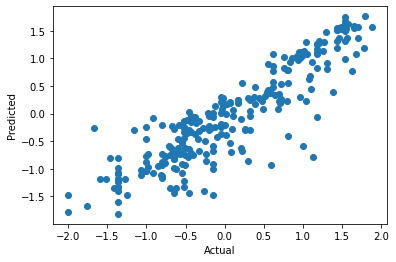

In [101]:
#checking the diff between actual and predicted value using graph
plt.scatter(x=yr_test,y=pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')


In [104]:
## Conclusion : -
a =np.array(yr_test)
predicted = np.array(rfr.predict(xr_test))
df =  pd.DataFrame({ 'Original' : a,
                     'predicted' :predicted ,
                   },index = range(len(a))) 
df


,Original,predicted
0,-1.466659,-0.750560
1,1.046164,0.229310
2,-1.011243,-0.245754
3,1.439710,1.555504
4,-2.006506,-1.616604
...,...,...
251,1.886035,1.549120
252,-0.545828,-0.829766
253,0.256939,-0.129998
254,-0.763355,-0.662901


# Saving the model for Regression

In [110]:
import pickle 
filename='Capacity_MW_Prediction.pickle'
pickle.dump(rfr,open(filename,'wb'))

# Conclusion

In [105]:
pred_probab = rfc.predict_proba(x_test)[:,1]
pred_probab


array([7.64759089e-01, 9.69242279e-02, 9.40277278e-01, 1.28279548e-01,
       4.99144314e-02, 6.49574147e-01, 5.84862669e-01, 4.19074237e-02,
       1.28703704e-02, 1.64800445e-02, 2.44940476e-02, 9.46036868e-01,
       7.39687297e-01, 6.37258732e-02, 4.15427171e-02, 0.00000000e+00,
       7.50000000e-04, 6.87232004e-01, 5.68965517e-03, 0.00000000e+00,
       1.58333333e-03, 2.59568773e-01, 2.57368036e-01, 0.00000000e+00,
       5.49223135e-02, 9.44116926e-01, 2.55914330e-01, 8.37688973e-01,
       9.23927888e-01, 2.16232014e-01, 6.48652056e-01, 8.30560910e-01,
       9.23927973e-02, 9.13314532e-01, 1.86044456e-02, 0.00000000e+00,
       1.27015360e-01, 2.10586656e-01, 0.00000000e+00, 8.78799944e-01,
       1.46293620e-01, 6.64204094e-01, 7.67356511e-01, 9.39555476e-01,
       2.09565007e-01, 0.00000000e+00, 3.03925472e-01, 5.00000000e-03,
       1.66666667e-03, 5.10511280e-01, 5.00000000e-03, 3.92171243e-01,
       0.00000000e+00, 9.37069917e-02, 9.01960338e-01, 6.03602878e-01,
      

In [106]:
fpr,tpr,thresholds = roc_curve(y_test,pred_probab,pos_label=True)


In [107]:
print(fpr)
print("\n")
print(tpr)
print("\n")
print(thresholds)


[0.         0.         0.         0.00540541 0.00540541 0.01081081
 0.01081081 0.01621622 0.01621622 0.02162162 0.02162162 0.02702703
 0.02702703 0.03243243 0.03243243 0.03783784 0.03783784 0.04324324
 0.04324324 0.04864865 0.04864865 0.05405405 0.05405405 0.05945946
 0.05945946 0.07567568 0.07567568 0.08108108 0.08108108 0.0972973
 0.0972973  0.16756757 0.16756757 0.2        0.2        0.6
 0.61081081 0.61621622 0.63243243 0.65945946 0.68648649 0.71891892
 0.75675676 0.81081081 0.82162162 0.82702703 0.83783784 0.84324324
 0.85405405 1.        ]


[0.         0.01408451 0.28169014 0.28169014 0.4084507  0.4084507
 0.43661972 0.43661972 0.49295775 0.49295775 0.67605634 0.67605634
 0.69014085 0.69014085 0.70422535 0.70422535 0.71830986 0.71830986
 0.73239437 0.73239437 0.81690141 0.81690141 0.83098592 0.83098592
 0.87323944 0.87323944 0.88732394 0.88732394 0.91549296 0.91549296
 0.97183099 0.97183099 0.98591549 0.98591549 1.         1.
 1.         1.         1.         1.         1.      

# AUC Curve

In [ ]:
AUC Curve,More the area under curve means better the prediction.

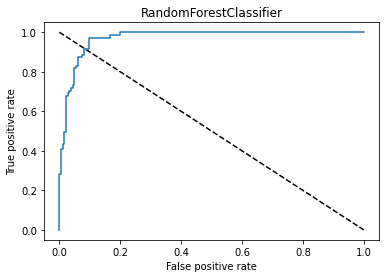

In [108]:
plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label = 'RandomForestClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RandomForestClassifier')
plt.show()


# Conclusion

 Model score is higher for classification  label ,means  for primary_fuel label.Accuracy score is higher than r2 score.